In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:

(train_data, train_target), (test_data, test_target) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

57026/57026 [==============================] - 0s 0us/step


In [3]:
len(train_data), len(test_data)

(404, 102)

In [4]:
404/506

0.7984189723320159

In [5]:
# take a look at the data

print(f'Training data : {train_data.shape}')
print(f'Test data : {test_data.shape}')
print(f'Training sample : {train_data[0]}')
print(f'Training target sample : {train_target[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2


 **Pre-processing the data**

 We are going to do a feature normalization . Feature normalizaion is when you subtract the mean of the feature from each feature and divide each result by the standard deviation.
 ???

 In fact this is **Standardization** not Normalization.


In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

# Note that the quantities used for normalizing the test data are computed using the
# training data. You should never use in your workflow any quantity computed on the
# test data, even for something as simple as data normalization.

In [7]:
# Build a neural network model to fit on our standardized data

# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'), #, input_shape=(train_data.shape[1])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

#3. Fit the model
history = model.fit(train_data, train_target, epochs=80, batch_size=16)

Epoch 1/80
26/26 [==============================] - 2s 4ms/step - loss: 21.6778 - mae: 21.6778
Epoch 2/80
26/26 [==============================] - 0s 4ms/step - loss: 18.7578 - mae: 18.7578
Epoch 3/80
26/26 [==============================] - 0s 4ms/step - loss: 13.3195 - mae: 13.3195
Epoch 4/80
26/26 [==============================] - 0s 4ms/step - loss: 7.9082 - mae: 7.9082
Epoch 5/80
26/26 [==============================] - 0s 3ms/step - loss: 6.0221 - mae: 6.0221
Epoch 6/80
26/26 [==============================] - 0s 6ms/step - loss: 4.3852 - mae: 4.3852
Epoch 7/80
26/26 [==============================] - 0s 5ms/step - loss: 3.5734 - mae: 3.5734
Epoch 8/80
26/26 [==============================] - 0s 10ms/step - loss: 3.3644 - mae: 3.3644
Epoch 9/80
26/26 [==============================] - 0s 6ms/step - loss: 3.0474 - mae: 3.0474
Epoch 10/80
26/26 [==============================] - 0s 6ms/step - loss: 2.8962 - mae: 2.8962
Epoch 11/80
26/26 [==============================] - 0s 6ms/st

In [8]:
# Evaluate our model on normalized data
model.evaluate(test_data, test_target)

4/4 [==============================] - 0s 3ms/step - loss: 2.5699 - mae: 2.5699


[2.5699188709259033, 2.5699188709259033]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 0, 'epochs')

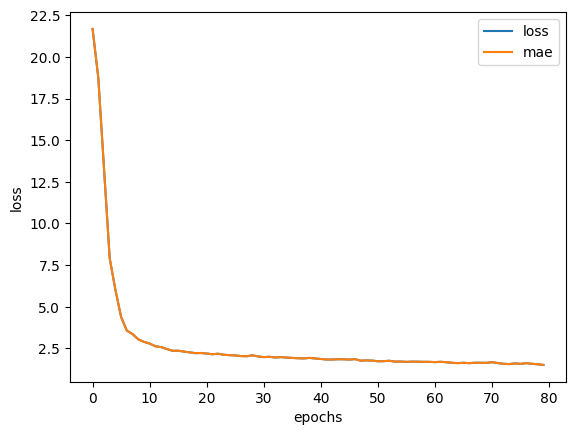

In [10]:
# Plot history (also known as loss curve or a training curve)
import pandas as pd

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [11]:
y_pred = model.predict(test_data)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[ 7.7035813],
       [18.853115 ],
       [20.806824 ],
       [30.913553 ],
       [23.641762 ],
       [21.551247 ],
       [27.1882   ],
       [21.700897 ],
       [19.509964 ],
       [21.89675  ],
       [15.60053  ],
       [17.230793 ],
       [16.64558  ],
       [41.55993  ],
       [18.616402 ],
       [19.746521 ],
       [25.746838 ],
       [19.24387  ],
       [18.93254  ],
       [27.091698 ],
       [12.082946 ],
       [13.982168 ],
       [20.706272 ],
       [15.532527 ],
       [19.187366 ],
       [22.432213 ],
       [27.692122 ],
       [28.64474  ],
       [10.968007 ],
       [19.722012 ],
       [20.197796 ],
       [14.240799 ],
       [32.214977 ],
       [23.910778 ],
       [17.631752 ],
       [ 8.730778 ],
       [16.610916 ],
       [18.38167  ],
       [19.37829  ],
       [25.995506 ],
       [29.963196 ],
       [25.920414 ],
       [12.59987  ],
       [41.570343 ],
       [28.737202 ],
       [24.609062 ],
       [26.985054 ],
       [18.86

In [12]:
test_target

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])